In [366]:
import numpy as np
import pandas as pd
import os


In [367]:
import matplotlib.pyplot as plt
import seaborn as sns

In [368]:
data = pd.read_csv("../data/Tamir_analysis.csv")
data



,public_date,gicdesc,cash_debt_Mean,debt_ebitda_Mean
0,09/30/2007,Communication Services,0.196,2.367
1,09/30/2007,Consumer Discretionary,0.227,1.474
2,09/30/2007,Consumer Staples,0.202,1.915
3,09/30/2007,Energy,0.317,1.297
4,09/30/2007,Financials,0.134,6.347
...,...,...,...,...
1515,12/31/2019,Industrials,0.225,2.413
1516,12/31/2019,Information Technology,0.340,2.184
1517,12/31/2019,Materials,0.156,2.949
1518,12/31/2019,Real Estate,0.135,3.846


In [369]:
data["date"] = pd.to_datetime(data["public_date"])
# pd.pivot_table(data, index = ["gicdesc"])
data

,public_date,gicdesc,cash_debt_Mean,debt_ebitda_Mean,date
0,09/30/2007,Communication Services,0.196,2.367,2007-09-30
1,09/30/2007,Consumer Discretionary,0.227,1.474,2007-09-30
2,09/30/2007,Consumer Staples,0.202,1.915,2007-09-30
3,09/30/2007,Energy,0.317,1.297,2007-09-30
4,09/30/2007,Financials,0.134,6.347,2007-09-30
...,...,...,...,...,...
1515,12/31/2019,Industrials,0.225,2.413,2019-12-31
1516,12/31/2019,Information Technology,0.340,2.184,2019-12-31
1517,12/31/2019,Materials,0.156,2.949,2019-12-31
1518,12/31/2019,Real Estate,0.135,3.846,2019-12-31


In [370]:
data = data.drop(columns = ["public_date"])


In [404]:
cash_debt = data.drop(columns = ["debt_ebitda_Mean"])
cash_debt["year"] = cash_debt["date"].dt.year
cash_debt = cash_debt.drop(columns = ["date"])

not_wanted = ["Communication Services", "Utilities", "Materials", "Real Estate", "Industrials"]

for i in not_wanted:
    cash_debt = cash_debt[cash_debt.gicdesc != i]

cash_debt.head()

,gicdesc,cash_debt_Mean,year
1,Consumer Discretionary,0.227,2007
2,Consumer Staples,0.202,2007
3,Energy,0.317,2007
4,Financials,0.134,2007
5,Health Care,0.298,2007
...,...,...,...
1511,Consumer Staples,0.193,2019
1512,Energy,0.287,2019
1513,Financials,0.125,2019
1514,Health Care,0.271,2019


Text(0.5, 1.0, 'AVG CASH-DEBT OVER TIME')

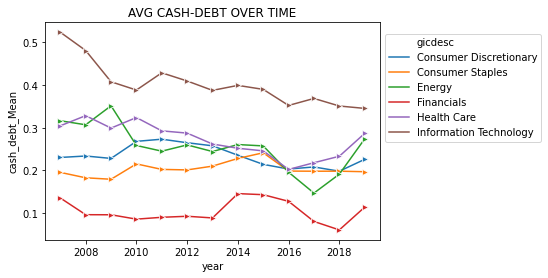

In [442]:
cash_plot = sns.lineplot("year","cash_debt_Mean",marker=">", hue = "gicdesc",data = cash_debt,  err_style=None)
cash_plot.legend(loc='center left', bbox_to_anchor=(1, .7), ncol=1)
plt.title("AVG CASH-DEBT OVER TIME")

In [430]:
ebitda = data.drop(columns = ["cash_debt_Mean"])
ebitda["year"] = ebitda["date"].dt.year
ebitda = ebitda.drop(columns = ["date"])

not_wanted = ["Communication Services", "Utilities", "Materials", "Real Estate", "Industrials"]

for i in not_wanted:
    ebitda = ebitda[ebitda.gicdesc != i]

ebitda.head()

,gicdesc,debt_ebitda_Mean,year
1,Consumer Discretionary,1.474,2007
2,Consumer Staples,1.915,2007
3,Energy,1.297,2007
4,Financials,6.347,2007
5,Health Care,1.482,2007


In [441]:
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'AVG EBITDA DEBT OVER TIME')

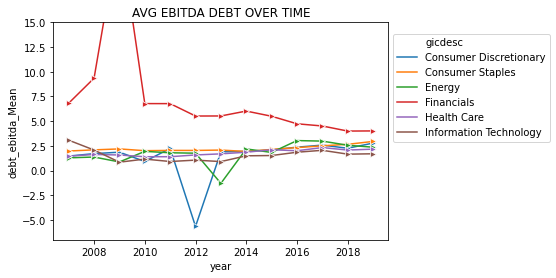

In [440]:
y_ticks = np.arange(-5,20,5)
ebitda_plot = sns.lineplot("year","debt_ebitda_Mean",marker=">", hue = "gicdesc",data = ebitda,  err_style=None)
ebitda_plot.legend(loc='center left', bbox_to_anchor=(1, .7), ncol=1)
ebitda_plot.set(ylim=(-7,15))
plt.title("AVG EBITDA DEBT OVER TIME")